# Exploratory Analysis

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import collections
import seaborn as sns

In [2]:
!ls 1.collect_data

1.1_Get_All_Parking_Zones.ipynb       GetParkingData.py
1.2_Get_Detailed_Blockface_Info.ipynb README.md
1.3_Get_Parking_Data.ipynb            Test_Collecting_Data.ipynb
1.4_Format_archived_data.ipynb        block_locations.csv
1.5_Process_Weather_Data.ipynb        blockface_detail.csv
2019.1001.pkl                         data_files
2019.1002.pkl                         failed
2019.1006.pkl


In [8]:
blockface_detail = pd.read_csv('1.collect_data/blockface_detail.csv', index_col='sourceelementkey')

In [9]:
blockface_detail.head()

,Unnamed: 0,blockfacename,location,paidparkingarea,paidparkingsubarea,parkingcategory,parkingspacecount,parkingtimelimitcategory,sideofstreet,latitude,longitude
sourceelementkey,,,,,,,,,,,
1001,0,1ST AVE BETWEEN CHERRY ST AND COLUMBIA ST,"{'type': 'Point', 'coordinates': [-122.3346935...",Pioneer Square,Core,Paid Parking,4,120.0,SW,47.602873,-122.334694
1002,1,1ST AVE BETWEEN CHERRY ST AND COLUMBIA ST,"{'type': 'Point', 'coordinates': [-122.3345126...",Pioneer Square,Core,Paid Parking,8,120.0,NE,47.602949,-122.334513
1006,2,1ST AVE BETWEEN COLUMBIA ST AND MARION ST,"{'type': 'Point', 'coordinates': [-122.3351432...",Commercial Core,Waterfront,Paid Parking,7,120.0,NE,47.603674,-122.335143
1009,3,1ST AVE BETWEEN MADISON ST AND SPRING ST,"{'type': 'Point', 'coordinates': [-122.3366575...",Commercial Core,Waterfront,Paid Parking,5,30.0,SW,47.605018,-122.336658
1010,4,1ST AVE BETWEEN MADISON ST AND SPRING ST,"{'type': 'Point', 'coordinates': [-122.3364474...",Commercial Core,Waterfront,Paid Parking,5,120.0,NE,47.605101,-122.336447


# Locations of parking spots

Let's see where all of the parking spaces are located!

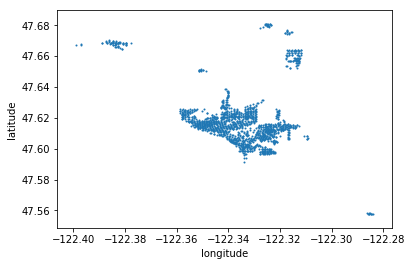

In [63]:
blockface_detail.plot(x='longitude', y='latitude', kind='scatter', s=1)
#fig = plt.gcf()
#fig.set_size_inches(5.26, 9.02)

#plt.ylim(47.55, 47.7)
#plt.xlim(-122.41, -122.28)
plt.show()

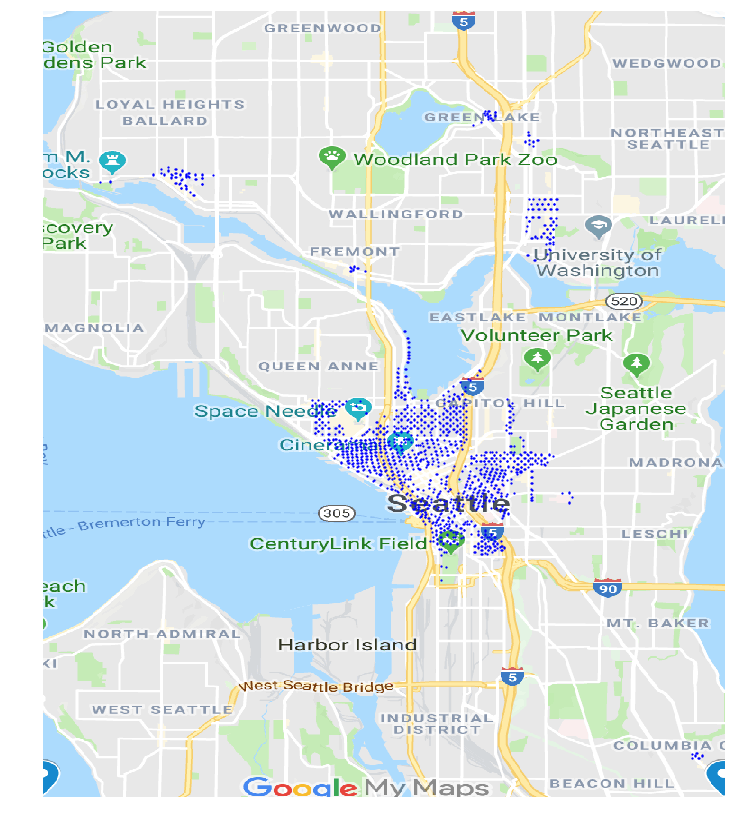

In [68]:
img = matplotlib.image.imread('1.collect_data/seattle_map.png')

dpi=80

height, width, nbands = img.shape

# What size does the figure need to be in inches to fit the image?
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)

ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

ax.imshow(img,extent=[-122.41, -122.28,47.55, 47.7])

ax.scatter(blockface_detail.longitude,blockface_detail.latitude,color='b', s=1.5)


plt.savefig('parking_overlaid.png', dpi=dpi)



Most of the parking spaces are clustered in the downtown area. But, there are a number of paid parking locations elsewhere in the city, including Columbia City, U-District, Fremont, and Ballard.

In [218]:
parking_area = blockface_detail.groupby('paidparkingarea').sum().reset_index()

In [219]:
parking_area

,paidparkingarea,Unnamed: 0,parkingspacecount,parkingtimelimitcategory,latitude,longitude
0,12th Avenue,8116,74,1560.0,618.918363,-1590.118278
1,Ballard,43116,542,11190.0,2717.080987,-6975.855561
2,Ballard Locks,4404,80,720.0,143.002308,-367.193352
3,Belltown,170939,1921,49890.0,12141.792233,-31198.571379
4,Capitol Hill,24198,364,5400.0,1809.536575,-4648.191765
5,Cherry Hill,4544,57,720.0,285.643496,-733.858325
6,Chinatown/ID,56773,401,8160.0,3236.683846,-8318.108187
7,Columbia City,5075,70,1440.0,475.578586,-1222.852078
8,Commercial Core,119002,1043,19860.0,6998.222174,-17983.404606
9,Denny Triangle,68197,542,18990.0,4333.104542,-11132.627540


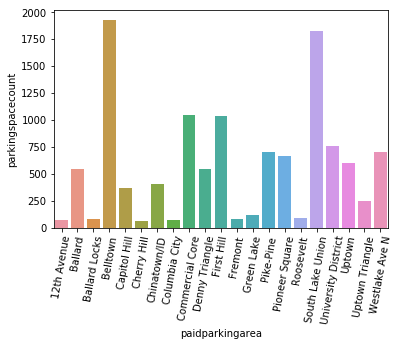

In [229]:
g = sns.barplot(data=parking_area, x='paidparkingarea', y='parkingspacecount')
_ = plt.xticks(rotation=80)

Specifically, Belltown and South Lake Union have the largest numbers of pa

# General Trends

To inspect general trends in the data, I group the data into daily averages for each blockface.

In [ ]:
def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(0)]
                       +[pd.Grouper(freq='1D', level=-1)]).mean())

In [90]:
years = range(2012, 2020)

all_data = []

for year in years:
    year_data = pd.read_pickle('1.collect_data/data_files/%d.pkl' % year)
    year_by_day = using_Grouper(year_data)
    all_data.append(year_by_day)
daily_data = pd.concat(all_data)

In [93]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3247231 entries, (1001, 2012-01-03 00:00:00) to (136322, 2019-08-30 00:00:00)
Data columns (total 2 columns):
PaidOccupancy        float64
ParkingSpaceCount    float64
dtypes: float64(2)
memory usage: 62.0 MB


In [95]:
daily_data.loc[1001].describe()

,PaidOccupancy,ParkingSpaceCount
count,2032.000000,2032.000000
mean,1.701777,5.082185
std,0.854680,0.756809
min,0.000000,4.000000
25%,1.086111,5.000000
50%,1.654167,5.000000
75%,2.243056,5.000000
max,8.213296,7.000000


We can see that the number of available spots has changed through the years, with a max of 7 spots available for ID 1001, and a min of 4. Additionally, the amount of spots being paid for has ranged from 0 to 8.2. 

There seems to be an error here (8.2 spots taken is higher than the max of 7), but the system doesn't preclude people from paying for the same spot. Parking payment is verified through a receipt displayed in the window. So if somebody pays for a spot and leaves, without having used the entire time that they purchased, somebody else can arrive and pay for the same spot. But, it seems unlikely that this would be the case for the entire day.

Let's now take a look at plots of parking occupancy for a bunch of blocks

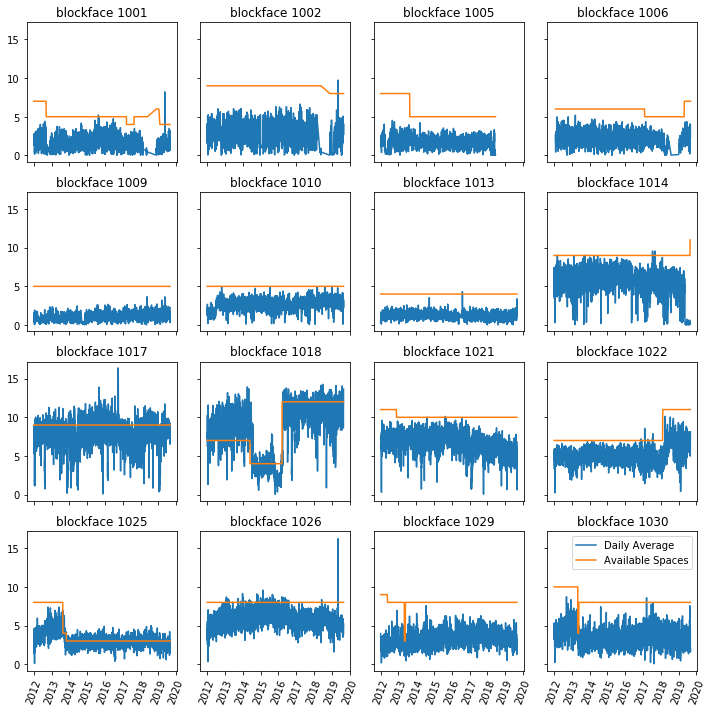

In [159]:
blockface_ids = daily_data.index.unique(level=0)[:16].values

fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    ax.set_title('blockface %d' % blockface_id)
    ax.plot(daily_data.loc[blockface_id].index, daily_data.loc[blockface_id]['PaidOccupancy'], label='Daily Average')
    ax.plot(daily_data.loc[blockface_id].index, daily_data.loc[blockface_id]['ParkingSpaceCount'], label='Available Spaces')
    #ax.legend()
    ax.xaxis.set_tick_params(rotation=70)
ax.legend()
plt.tight_layout()
plt.show()


There are a number of interesting things in the plots.

1. For blockfaces 1001, 1002, 1006, there appears to be some missing occupancy data. But, it could be the case that, e.g., construction was occuring in the area at the time ([Seattle has a lot of construction!](https://www.king5.com/article/news/seattle-still-the-crane-capital-of-the-us/281-7f6d9c57-e6dd-4eef-986f-25af5361952a)) limiting the number of parking spaces actually available on the block.
2. The data for blockface 1005 ends in 2018. Since city streets and paid parking locations are revised every year, it could be that this location does not have paid parking any longer. Rechecking the data online shows that there is no data past the middle of 2018.
3. Some blockfaces show an average higher than the maximum. I should recheck this data to see what is going on here.

In [160]:
daily_data.to_pickle('1.collect_data/data_by_day.pkl')

## General Trends for the whole city

Let's see how available parking spaces has changed over time.

In [163]:
all_blocks = daily_data.groupby(daily_data.index.get_level_values(1)).sum()


,PaidOccupancy,ParkingSpaceCount
OccupancyDateTime,,
2012-01-03,3686.852899,11674.0
2012-01-04,3881.353360,11780.0
2012-01-05,4304.302339,11728.0
2012-01-06,4446.301926,11747.0
2012-01-07,3901.565934,11270.0
2012-01-09,3738.333105,11583.0
2012-01-10,4185.724404,11688.0
2012-01-11,4207.283639,11795.0
2012-01-12,4311.957429,11802.0


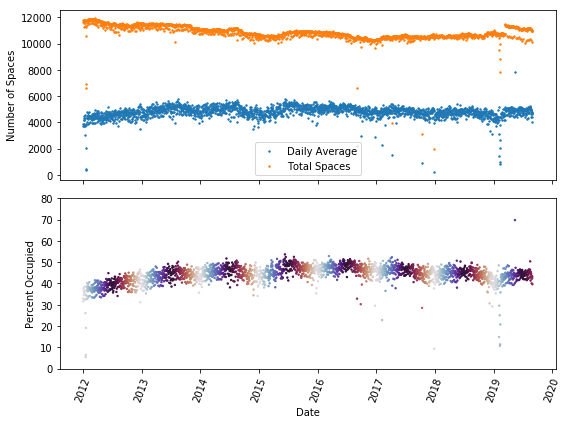

In [210]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6), sharex=True)

#plt.xticks(rotation=70)
#ax.set_title('blockface %d' % blockface_id)
ax1.scatter(all_blocks.index, all_blocks['PaidOccupancy'], label='Daily Average', s=2)
ax1.scatter(all_blocks.index, all_blocks['ParkingSpaceCount'], label='Total Spaces', s=2)
ax1.set_ylabel('Number of Spaces')
#ax1.xaxis.set_tick_params(rotation=70)
ax1.legend()

ax2.scatter(all_blocks.index, 
            100*all_blocks['PaidOccupancy']/all_blocks['ParkingSpaceCount'], 
            s=2, 
            c=all_blocks.index.dayofyear, 
            cmap='twilight')
ax2.xaxis.set_tick_params(rotation=70)
ax2.set_ylim(0,80)
ax2.set_ylabel('Percent Occupied')
ax2.set_xlabel('Date')


plt.tight_layout()
plt.show()

There appears to be a few trends in the data.

1. The total number of parking spaces appears to have decreased in the first few years, but has since plateaued.
2. There is some seasonality to the data. The winter months appear to have fewer spots occupied.
3. The percent of spaces occupied around the city has hovered just under 50%.

## Some Outliers

There seems to be a number of days that fall outside of the normal range of available spaces as well as occupied spaces. Let's see if some of this may be due to weather.

In [181]:
strange_dates = all_blocks[all_blocks['ParkingSpaceCount'] < 9000.]
strange_dates

,PaidOccupancy,ParkingSpaceCount
OccupancyDateTime,,
2012-01-18,350.421917,6576.0
2012-01-19,443.254776,6899.0
2016-09-03,2172.688974,6614.0
2017-04-10,1534.551676,3938.0
2017-10-13,895.102298,3138.0
2017-12-27,184.399765,1982.0
2019-02-09,838.724327,7861.0
2019-02-11,1001.058861,8816.0


In [182]:
weather_data = pd.read_pickle('1.collect_data/data_files/weather/2010-2019_daily_weather.pkl')

In [183]:
weather_data.loc[strange_dates.index]

,PRCP,SNOW,TAVG,TMAX,TMIN
OccupancyDateTime,,,,,
2012-01-18,0.35,2.7,30.0,33.0,27.0
2012-01-19,0.50,2.2,28.0,29.0,27.0
2016-09-03,0.06,0.0,62.0,69.0,55.0
2017-04-10,0.32,0.0,48.5,54.0,43.0
2017-10-13,0.14,0.0,48.0,56.0,40.0
2017-12-27,0.00,0.0,37.0,40.0,34.0
2019-02-09,0.16,2.6,30.5,34.0,27.0
2019-02-11,0.74,1.9,32.5,36.0,29.0


A few of the dates above have actual snowfall (not so common for seattle, see below). Additionally, these days are towards the higher end of snowfall that is seen in seattle.

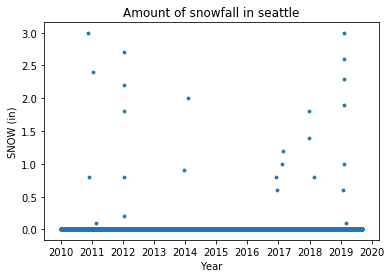

In [191]:
plt.figure(3)
plt.scatter(weather_data.index, weather_data.SNOW, s=8)
plt.xlabel('Year')
plt.ylabel('SNOW (in)')
plt.title('Amount of snowfall in seattle')
plt.show()